In [1]:
from pathlib import Path
import sys
#Set root to be the main project folder
root = Path.cwd().parent.parent
print(root)
py_path = Path(root/'Code/py_files')
print(py_path)
data_path = Path(root/'Data')
print(data_path)
notes_path = Path(root/'Notes')
print(notes_path)

#Add location of py files to path so we can import
sys.path.insert(0,str(py_path))

/home/gnacikm/Documents/GitHub/FeedforwardNeuralNetwork
/home/gnacikm/Documents/GitHub/FeedforwardNeuralNetwork/Code/py_files
/home/gnacikm/Documents/GitHub/FeedforwardNeuralNetwork/Data
/home/gnacikm/Documents/GitHub/FeedforwardNeuralNetwork/Notes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
from ANNfeedforward import FeedForwardANN

## Example: Digit Recognition - MNIST

In [3]:
npzfile = np.load(data_path/"mnist_data_set/data_mnist.npz")
npzfile.files

x_train = npzfile["X_train"]
y_train = npzfile["y_train"]
x_test = npzfile["X_test"]
y_test = npzfile["y_test"]

size_input_lay = x_train.shape[1]
size_output_lay = y_train.shape[1]

In [4]:
x_train.shape[0]

60000

In [5]:
shape = (size_input_lay, 64, size_output_lay)
ActFun =  ["ReLu", "sigmoid"]

In [6]:
DigitRecog = FeedForwardANN(shape, ActFun)

In [7]:
epochs = 3

In [8]:
# one epoch takes about 1 min 20 sec
DigitRecog.train(x_train, y_train, epochs, optimizer = "sgd", minibatch_size = 50, learning_rate = 0.5 )

epochs:  33%|███▎      | 1/3 [00:39<01:19, 39.63s/it]

loss: 0.010323220155540793, accuracy: 0.94295


epochs:  67%|██████▋   | 2/3 [01:16<00:37, 37.84s/it]

loss: 0.007200013837315059, accuracy: 0.95975


epochs: 100%|██████████| 3/3 [01:50<00:00, 36.67s/it]

loss: 0.005954830436657879, accuracy: 0.96865


In [9]:
DigitRecog.score(x_test, y_test)

0.9655

In [10]:
DigitRecog.loss(x_test, y_test)

0.00659983615321617

# Example: Fashion MNIST

In [11]:
npzfile = np.load(data_path/"mnist_data_set/data_fashion_mnist.npz")
npzfile.files

x_train = npzfile["X_train"]
y_train = npzfile["y_train"]
x_test = npzfile["X_test"]
y_test = npzfile["y_test"]

size_input_lay = x_train.shape[1]
size_output_lay = y_train.shape[1]

In [12]:
x_train.shape[0]

60000

In [13]:
shape = (size_input_lay, 64, size_output_lay)
ActFun =  ["ReLu", "sigmoid"]

In [14]:
FashionRecog = FeedForwardANN(shape, ActFun)

In [15]:
epochs = 3

In [16]:
# one epoch takes about 1 min 20 sec
FashionRecog.train(x_train, y_train, epochs, optimizer = "sgd", minibatch_size = 50, learning_rate = 0.5 )

epochs:  33%|███▎      | 1/3 [00:33<01:07, 33.65s/it]

loss: 0.023367085138930183, accuracy: 0.8421


epochs:  67%|██████▋   | 2/3 [01:08<00:34, 34.23s/it]

loss: 0.019837783213916802, accuracy: 0.8674333333333333


epochs: 100%|██████████| 3/3 [01:39<00:00, 33.30s/it]

loss: 0.019278400551230725, accuracy: 0.8719


In [17]:
FashionRecog.score(x_test, y_test)

0.8546

In [18]:
FashionRecog.loss(x_test, y_test)

0.021668438486351124

# Example: Exponential map

In [19]:
x_train= np.linspace(0, 10, 1000)
y_train = np.exp(-x_train)

In [20]:
x_train  = x_train.reshape(1000, 1)

In [21]:
shape = (1, 1)
ActFun =  ["sigmoid"]

In [22]:
ExpFun = FeedForwardANN(shape, ActFun)

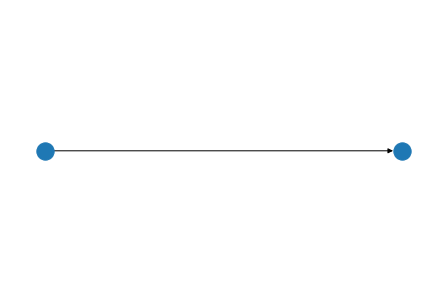

In [23]:
ExpFun.plotnetwork()

In [24]:
epochs = 100
ExpFun.train(x_train, y_train, epochs, minibatch_size = 50, learning_rate = 0.5, mnist=False)

epochs: 100%|██████████| 100/100 [00:02<00:00, 45.86it/s]


In [25]:
pred_y = [ExpFun.feedforward(x) for x in x_train]

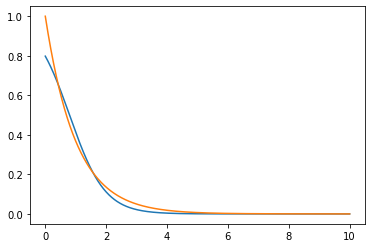

In [26]:
plt.plot(x_train, pred_y)
plt.plot(x_train, y_train)
plt.show()

## Example: XOR issue

In [27]:
x = np.array([[0.0, 0.0], [0.0, 0.1], [1.0, 0.0], [1.0, 1.0]])
y = np.array([0.0,1.0,1.0,0.0])

In [33]:
shape = (2,3, 1)
ActFun =  ["sigmoid"]
XOR_net = FeedForwardANN(shape, ActFun)

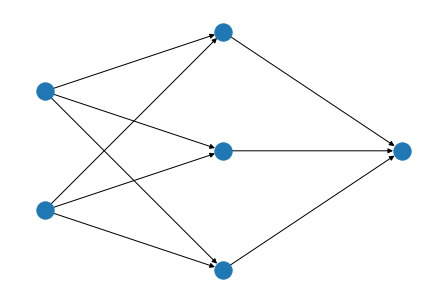

In [34]:
XOR_net.plotnetwork()

In [35]:
epochs = 10000

In [36]:
XOR_net.train(x, y, epochs, minibatch_size = 3, learning_rate = 0.5,  mnist=False)

epochs: 100%|██████████| 10000/10000 [00:02<00:00, 3771.97it/s]


In [37]:
[XOR_net.feedforward(x_el) for x_el in x]

[array([0.48727376]),
 array([0.6397301]),
 array([0.97916045]),
 array([0.05466862])]